In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
folder_path="/content/drive/MyDrive/Patologías Edificatorias/IMAGENES CLASIFICADAS"

In [ ]:
#PIL o Python Imaging Library se utiliza para trabajar con imagenes
#os se utiliza para navegar por el sistema operativo, como archivos de carpetas

from PIL import Image
import os


In [ ]:
#creamos una lista vacía en la que iremos almacenando los datos de nuestras imagenes
image_data=[]

for root, dirs, files in os.walk(folder_path):
  #os.walk() es una función que recorre cada archivo de cada una de las carpetas del path que hemos especificado
  for file in files:
    if file.endswith(".jpg") or file.endswith(".png"):
      #obtenemos la ruta completa de la imagen
      image_path=os.path.join(root, file)
      #obtenemos el nombre de la categoría en cuestión
      category=os.path.basename(root)
      #añadimos a la lista los datos de cada imagen en forma de diccionario
      image_data.append({"path": image_path, "category": category})

df=pd.DataFrame(image_data)
df.head(3)


,path,category
0,/content/drive/MyDrive/Patologías Edificatoria...,11_HEALTHY
1,/content/drive/MyDrive/Patologías Edificatoria...,11_HEALTHY
2,/content/drive/MyDrive/Patologías Edificatoria...,11_HEALTHY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9070 entries, 0 to 9069
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   path      9070 non-null   object
 1   category  9070 non-null   object
dtypes: object(2)
memory usage: 141.8+ KB


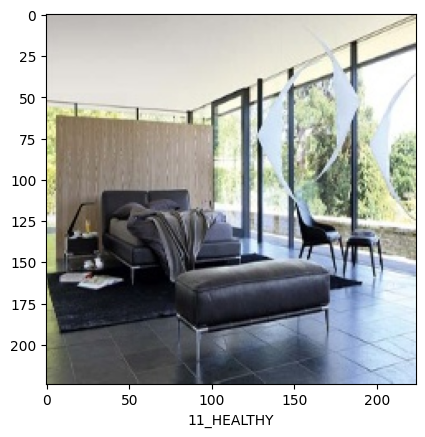

In [ ]:
# Comprobamos que se vean las imagenes

# Seleccionamos la primera fila del DataFrame
primera_fila = df.iloc[0]

# Obtenemos la ruta de la imagen y la etiqueta de la primera fila
ruta_imagen = primera_fila["path"]
etiqueta = primera_fila["category"]

# Cargamos la imagen desde la ruta especificada
imagen = Image.open(ruta_imagen)

# Mostramos la imagen
plt.figure()
plt.imshow(imagen)
plt.grid(False)
plt.xlabel(etiqueta)  # Agregar la etiqueta como xlabel
plt.show()


In [ ]:
#echamos un vistazo a nuestras categorías
categorias=df.value_counts("category").sort_index()
categorias

category
01_COLLAPSE                909
02_OOP_PARTIAL COLLAPSE    784
03_IP_PARTIAL COLLAPSE     813
04_COMBINED_CORNERS        793
05_RC ST FAILURE           865
06_SPALLING                810
07_DAMAGE TO INFILL        804
08_POUNDING_LEANING        819
09_TOE CRUSHING            819
10_DISLODGEMENTS           864
11_HEALTHY                 790
Name: count, dtype: int64

In [ ]:
categories_batch1 = ["09_TOE CRUSHING"]
df_batch1 = df[df["category"].isin(categories_batch1)]

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageEnhance

#creamos una función para modificar contraste y saturación de manera aleatoria
def adjust_contrast_saturation(img):
    img = tf.image.random_contrast(img, lower=0.25, upper=1.75)  # Ajuste de contraste
    img = tf.image.random_saturation(img, lower=0.25, upper=1.75)  # Ajuste de saturación
    return img

# Crear un objeto ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=2,
    horizontal_flip=True,
    brightness_range=[0.3, 1.5],
    preprocessing_function=adjust_contrast_saturation,
    fill_mode='nearest'
)



In [ ]:
#Empezamos por crear una carpeta en la que guardar las nuevas imagenes aumentadas
augmented_folder_path = "/content/drive/MyDrive/Patologías Edificatorias/IMAGENES CLASIFICADAS"
from tensorflow.keras.preprocessing import image


In [ ]:
def aplicar_augmentation(img_path, category, n_aug):
  category_path = os.path.join(augmented_folder_path, category)
  os.makedirs(category_path, exist_ok=True)
  img=Image.open(img_path)
  if img.mode !="RGB":
    img=img.convert("RGB")

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)

  for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    augmented_image=image.array_to_img(batch[0])
    augmented_image.save(os.path.join(augmented_folder_path, category, f'augmented_{i}_{os.path.basename(img_path)}'))
    if i >= n_aug - 1:  # Salir después de generar el número deseado de imágenes aumentadas
      break

In [ ]:
#aplicación del data augmentation y guardado de imagenes:
os.makedirs(augmented_folder_path, exist_ok=True)

#BATCH
for index, row in df_batch1.iterrows():
  img_path=row["path"]
  category=row["category"]
  aplicar_augmentation(img_path, category, 12)
